# Sales Analysis

Video I had used to help me in this study: https://www.youtube.com/watch?v=eMOA1pPVUc4&list=WL&index=12


    Here We'll analyze a section of 'Imaginary' E-commerce.
    There will be simple analysis and a little more complex ones.
        
    We'll basically:
        Make a question.
        Prepare data to respond it
        And analyze to get a sensible information that answers the question.

## Agenda 
    1 - Data Exploration
    2 - Data analysis
        2.1 What was the best month for sales? How much was earned that month?¶
            Clean up the data
            Now, We can finally find out the answer to the first question.
            Charts.
        2.2 What city had the highest number of sales?
        2.3 What time should we display advertisements to maximize likelihood of customer's buying product?
        2.4 What products are most often sold together?
        2.5 What product sold the most? 

In [376]:
# Imports

# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To a specific task at the end 
from itertools import combinations
from collections import Counter

In [126]:
all_data = pd.read_csv("all_data.csv")

## 1 - Data Explotration
        Checking out the data format, so We'll know how to deal with it
        in order to answer our questions.

In [97]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [98]:
# Number of rows and columns

all_data.shape

(186850, 6)

In [99]:
# We can see the column names in .head(), but .columns can be pretty useful at some moments

all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [100]:
# Data Type in each column
'''
    Notice that even though there are numeric columns, the data itself is an
    object (str, list, dict...), not a numeric type (int, float...)
'''

all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [101]:
# We can also use it in a single column

all_data.Product.dtypes

dtype('O')

In [102]:
# Basic information about the DataFrame (rows, columns, column names, type of data in columns...)
# It's kind of a summed up version of all we did until now.

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [103]:
# Looking for NaN values
'''
    This approach is not the best to visualize them, since We have 186850 rows to look at...
'''

all_data.isna().head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [104]:
'''
    So We can use .any() to know if there's at least 1 missing value in the columns
'''

all_data.isna().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [105]:
# And .sum() will tell us the number of Null values

all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [106]:
# We can also check its percentage, that way, we can decide if we'll either drop or replace them

all_data.isna().sum() / all_data.shape[0] 

Order ID            0.002917
Product             0.002917
Quantity Ordered    0.002917
Price Each          0.002917
Order Date          0.002917
Purchase Address    0.002917
dtype: float64

In [107]:
# Less than 0.5%. It's a really small piece of the dataset

(all_data.isna().sum() / all_data.shape[0]) * 100

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

## 2 - Data analysis
        We have already started it, but now let's focus on manipulating the dataset to
        fullfil our purpose.
        
    
### 2.1 What was the best month for sales? How much was earned that month?

In [127]:
'''
    First of all, in ['Order Date'] column We don't have only the month, besides, 
    it's an object data type. We could turn it into datetime, because it's better
    to work with, but for now, creating a specific column for the month will be 
    enough.
'''

all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [128]:
'''
    We inicialize the column as ['Month'] and to get only the 2 first indexes of the 
    Order Date string we can use .str
    That way we'll be able to use string methods in the column values.
'''
# Observe this exemple first:
testing = '04/19/19 08:46'
testing[0:2]

'04'

In [129]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [132]:
'''
    The point is, ['Month'] is not a numerical value.
'''
all_data.Month.dtypes

dtype('O')

In [133]:
''' 
    Then We're going to use .astype() to turn the values into numeric ones.
    
    However, We'll encounter this:
        
        ValueError: cannot convert float NaN to integer
    
    The NaN values are causing problems to us. We need to get rid of them, 
    before continuing

'''

all_data.Month = all_data.Month.astype('int')

ValueError: cannot convert float NaN to integer

#### Clean up the data
        Dealing with NaN values and more problems that might join the party

In [134]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64

In [135]:
# As we know, there are 545 rows with NaN.

all_data[all_data.isna().any(axis=1)].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
# Now let's get rid of them, because there's so few values they won't disturb the analysis

all_data.dropna(inplace=True)

In [139]:
# Now, We should be able to .astype('int')
'''
    Yeah, Nop! 
    
    ValueError: invalid literal for int() with base 10: 'Or'
    
    It seems some values in ['Month'] column are the string: 'Or'
    And as We can not transform 'Or' into a number. We'll have to 
    remove these values.
'''

all_data.Month = all_data.Month.astype('int')

ValueError: invalid literal for int() with base 10: 'Or'

In [140]:
# There are 355 'Or' values

all_data[all_data.Month == 'Or'].count()

Order ID            355
Product             355
Quantity Ordered    355
Price Each          355
Order Date          355
Purchase Address    355
Month               355
dtype: int64

In [141]:
'''
    Some ['Order Date'] columns instead of the date had literally 'Order Date'
    as values. So, When we got the [0:2] indexes, 'Or' was the returning.
    
'''

all_data[all_data.Month == 'Or'].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [144]:
'''
    a Easy solution is just to reset all_data to be
    
    all_data[ where ['Month'] is different than 'Or']
'''

all_data[all_data.Month != 'Or'].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [145]:
# Same result, but now we just applied it in the actual dataset

all_data = all_data[all_data.Month != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [147]:
# Now We should be able to convert ['Month'] into integer
# \(*O*)/ YEAAHHHH
all_data.Month = all_data.Month.astype('int')

    Let me remind you of the question we're trying to respond:
    What was the best month for sales? How much was earned that month?
    
    To do that, We need to know the total sale prices. In other words:
    Quantity Ordered * Price Each = total sale prices
    
    That's a simple task, but you need to remember that the data type 
    of these columns is 'object (we're going to convert it to numeric)

In [148]:
# This time, let's use pd.to_numeric()

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) 

In [149]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Now, We can finally find out the answer to the first question.

In [150]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [227]:
sales = all_data.groupby('Month').sum()['Sales']
sales

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

### 2.1 What was the best month for sales? How much was earned that month?
        As We can see December as the month with the highest sales with 4.613443 dollars
        spent in produtcts.
        
        Probably because of Christmas. October has the second highest value, should we
        think maybe Halloween is the reason?    
                
        Let's use some charts to visualize that information.

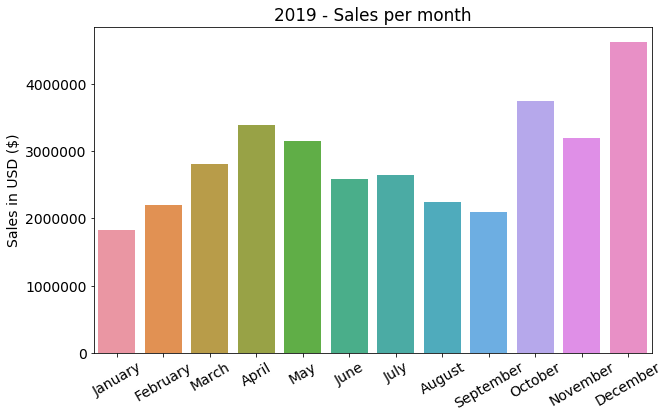

In [237]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
tick_values = range(12)

plt.figure(figsize=(10,6))

sns.barplot(sales.index, sales, )
plt.xticks(ticks = tick_values ,labels = months, rotation=30)
plt.rc("font" ,size=14)

plt.title('2019 - Sales per month')
plt.xlabel(None)
plt.ylabel('Sales in USD ($)')


plt.show()

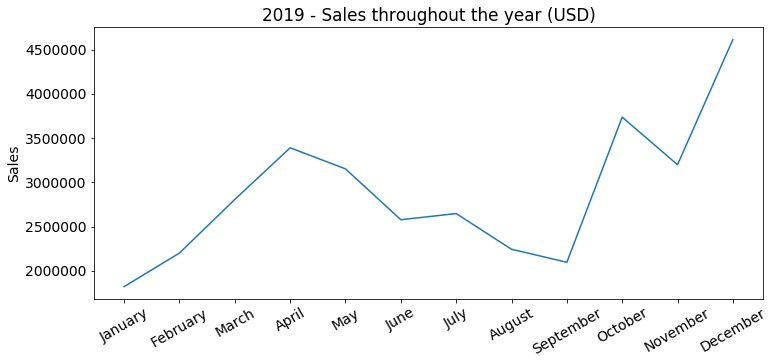

In [235]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
tick_values = sales.index

plt.figure(figsize=(12,5))

sns.lineplot(sales.index, sales, )
plt.xticks(ticks = tick_values ,labels = months, rotation=30)
plt.rc("font" ,size=14)

plt.title('2019 - Sales throughout the year')
plt.xlabel(None)

plt.show()

### 2.2 What city had the highest number of sales?
        We can get the city from the ['Purchase Address'] column.
        But as you already know, that's another challenge.

In [239]:
'''
    We'll split the ['Purchase Address'] and get only the city name. 
    .apply() is a good fuction to use in this situation
'''

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [243]:
'''
    Using .apply() to apply the lambda function on the entire column.
    And lambda to split the values on the comma. Exemple:
    
        917 1st St, Dallas, TX 75001  -->  ['917 1st St', ' Dallas' ' TX 75001']
    Now We get the index of the city             [0]          [1]        [2]
    
'''

all_data['City'] = all_data['Purchase Address'].apply(lambda column: column.split(',')[1])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Test_Column,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles


    But there is a not minimal problem. Some cities have 'duplicates'. Cities with same name, but
    located in different States. To solve this, let's also put the State next to the city name.
    And this time, We're going to make our own fuction to complete the task.

In [291]:
'''
    They'll basically do the same as before, but now .strip(' ') will remove the blanck space in the values:
    ' Dallas'  -->  'Dallas'
    
    And We are going to split again (in the blank space) to obtain the 'TX'
    
    get_city(address):
        .split(): 
            917 1st St, Dallas, TX 75001  -->  ['917 1st St', ' Dallas' ' TX 75001'] --> return [1]  
                   (address)                         [0]          [1]        [2]
        .strip(' '):
                ' Dallas'  -->  'Dallas'
                
                
     get_state(address):
        .split(): 
            917 1st St, Dallas, TX 75001  -->  ['917 1st St', ' Dallas' ' TX 75001'] --> return [2]
                   (address)                         [0]          [1]        [2]
        .split(' '):
                ' TX 75001'  -->  [' ', 'TX', '75001'] --> return [1]
                                   [0]   [1]    [2]
                                                 
    ps: Within lambda we're using formated string f'{variable} normal text'
'''

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [293]:
# Notice we have 2 Portlands
sales_per_city = all_data.groupby('City').sum()
sales_per_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


### 2.2 What city had the highest number of sales?
        We have a Winner: San Francisco!
        
        And again, let's plot that information.

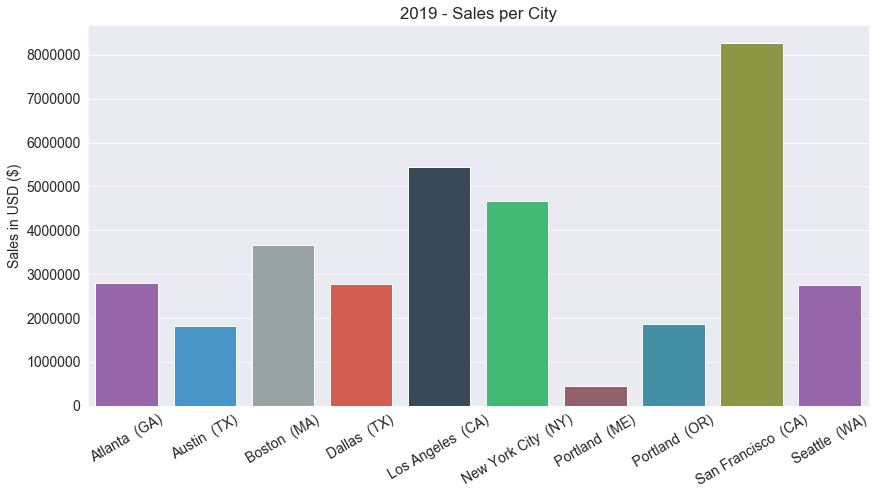

In [294]:
plt.figure(figsize=(14,7))

sns.set_style("darkgrid")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#9b5966","#3498b6",'#95a536']

sns.barplot(sales_per_city.index, sales_per_city.Sales, palette=flatui)

plt.rc("font" ,size=14)
plt.xticks(rotation=30)

plt.title('2019 - Sales per City')
plt.xlabel(None)
plt.ylabel('Sales in USD ($)')


plt.show()

### 2.3 What time should we display advertisements to maximize likelihood of customer's buying product?
        Now It is a good time for us to use the datetime type. It'll make our work much easier
        due to its functionalities. Even with 'datetime' consuming a little bit more space in memory.

In [299]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)


In [300]:
# Converting
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [301]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [304]:
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [306]:
'''
    Now Lets's better prepare the data to create a line graph.
    For this Well' need a new column to 'count' the number of
    events (basically number of orders)
'''
all_data['Count'] = 1

In [308]:
# Getting the hour keys to use in the graph.
hours = [hour for hour, df in all_data.groupby(['Hour'])]

In [341]:
all_data.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


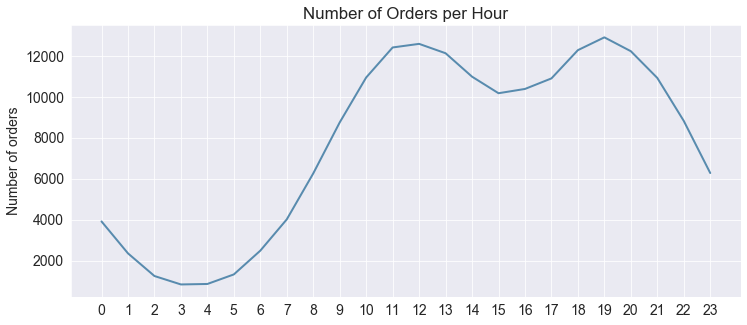

In [343]:
plt.figure(figsize=(12,5))

sns.set_style("darkgrid")

sns.lineplot(hours, all_data.groupby(['Hour']).count()['Count'], color='#588bae', linewidth=2)
plt.title('Number of Orders per Hour')
plt.xticks(hours)
plt.ylabel('Number of orders')


plt.show()

### 2.3 What time should we display advertisements to maximize likelihood of customer's buying product?
        Looking at the char, displaying adds slightly before 11am and 7pm seems to be a great option.

### 2.4 What products are most often sold together?
       If the Order ID is the same, that means those products were bought at the same time, for the same client.
       We can use this line of thought to get an answer.

In [344]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [349]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time

# Checking the same order IDs    
# keep=False (We want to keep all duplicates, since we'll use them)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1


    Now We need to 'join' the duplicates, so We can use them as a unique observation.

In [362]:
df = df.copy() # To fix warning:  https://www.youtube.com/watch?v=m34fhLaPD-U
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda product: ','.join(product))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [363]:
''' 
    As you see, We joined in both IDs, so now we have actual duplicates. 
    We need to remove them. 
'''
# Keeping only two columns
product_orders = df[['Order ID', 'Grouped']].drop_duplicates()

product_orders.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [364]:
product_orders.shape

(7136, 2)

In [398]:
product_orders.Grouped

3                             Google Phone,Wired Headphones
18                        Google Phone,USB-C Charging Cable
30        Bose SoundSport Headphones,Bose SoundSport Hea...
32                      AAA Batteries (4-pack),Google Phone
119           Lightning Charging Cable,USB-C Charging Cable
                                ...                        
186781    Apple Airpods Headphones,Apple Airpods Headphones
186783    iPhone,Lightning Charging Cable,Lightning Char...
186791         34in Ultrawide Monitor,AA Batteries (4-pack)
186803              Wired Headphones,AAA Batteries (4-pack)
186841                    Google Phone,USB-C Charging Cable
Name: Grouped, Length: 7136, dtype: object

In [401]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

# Counting pairs that arise from combinations in the product_orders['Grouped'] 'lists'

count = Counter()

for row in product_orders['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(15):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58


    Knowing that, We could try to make more efficient promotions.
    Promoting an 'iPhone' with a 'Lightning Charging Cable', since people
    usually order them together. Or after someone buy a 'Google Phone'
    show some 'Wired Headphones' add.

### What products are most often sold together?
    iPhone and lightning charging cable. And
    Google Phone and USB-C charging cable

### 2.5 What product sold the most? 
        And for the last task, a simple one.
        We just need to group the data by products
        and then use the quantity ordered to know
        how many of each product was ordered.

In [413]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

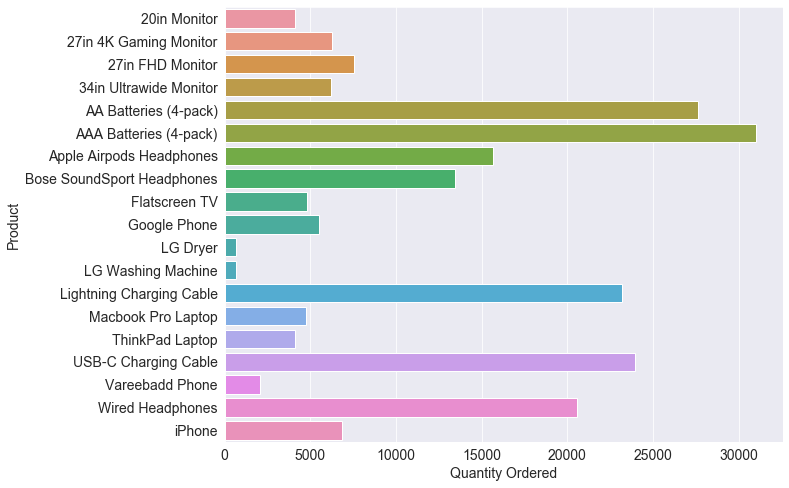

In [423]:
plt.figure(figsize=(10,8))

sns.barplot(quantity_ordered, quantity_ordered.index)

plt.show()

### What product sold the most?
    Clearly AAA Batteries (4-pack)